# Gelila Yimtatu's Exploratory Data Analysis Project Description

### This is my EDA of Hillary Clinton's emails! Throughout this Jupyter notebook I will be listing every single step that I do as long as clear comments to guide you through the analysis process. My objective is to uncover insights and patterns within Hillary Clinton's emails dataset. Let's dive into it then!

Primary objective of EDA project is to 
- Uncover insights from Hillary Clinton's emails using NLP and statistical methods. The project aims to:
    - Identify the common topics discussed using TF-IDF
    - Understand the network of senders and recipients to identify key figures and their relationships.
    - Explore the frequency and patterns of email communications over time.
    

In [310]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gelilayimtatu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [311]:
#My Imports
import numpy as np
import pandas as pd
from pathlib import Path
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
import re
import pandas as pd
from nltk.stem import PorterStemmer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gelilayimtatu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [312]:
#Bringing in the data
aliases = pd.read_csv('Aliases.csv')
email_recievers = pd.read_csv('EmailReceivers.csv')
emails = pd.read_csv('emails.csv')
persons = pd.read_csv('persons.csv')


My first approach is to peek into the different dataframes and understand what is going on. In the comments I will list what I have gathered from the Kaggle repository as well as inferred from looking closely at the content of the dataframes.

In [313]:
aliases

#Id - unique identifier for internal reference
#Alias - text in the From/To email fields that refers to the person
#PersonId - person that the alias refers to

#There are repeated numbers under PersonId
#Note that multiple alias correspond to one person/number

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5
...,...,...,...
845,846,marshallcp@state.goy,509
846,847,sid blumenthal,510
847,848,monica.hanle,511
848,849,hanle mr@state.gov,512


In [314]:
amount_of_people = aliases['PersonId'].max()
amount_of_people

#There are 513 people

513

In [315]:
email_recievers
#Id - unique identifier for internal reference
#EmailId - Id of the email
#PersonId - Id of the person that received the email

#Here shows emails as second column and recievers on third
#Just by looking- note how emails are repeated and PersonID differs
    #Shows emails sent ot multiple people
    

,Id,EmailId,PersonId
0,1,1,80
1,2,2,80
2,3,3,228
3,4,3,80
4,5,4,80
...,...,...,...
9301,9302,7942,80
9302,9303,7943,80
9303,9304,7944,80
9304,9305,7944,162


In [316]:
emails

#7945 emails total
#I see some NaN, might need to clean...

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,7941,C05778462,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>",NaN,"Thursday, December 16, 2010 7:41 PM",F-2014-20439,C05778462,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
7941,7942,C05778463,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>","Sullivan, Jacob J; Mills, Cheryl D; Abedin, Huma","Thursday, December 16, 2010 8:09 PM",F-2014-20439,C05778463,08/31/2015,RELEASE IN FULL,Big change of plans in the Senate. Senator Rei...,UNCLASSIFIED U.S. Department of State Case No....
7942,7943,C05778465,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,"Thursday, December 16, 2010 10:52 PM",F-2014-20439,C05778465,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
7943,7944,C05778466,FROM,H,PVerveer,143.0,2012-12-17T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,"PVervee,",NaN,NaN,12/14/201,F-2014-20439,C05778466,08/31/2015,RELEASE IN PART,"PVerveer B6\nFriday, December 17, 2010 12:12 A...","Hi dear Melanne and Alyse,\nHope this email re..."


At first glance, I can see that there a lot of missing values. However if I were to drop _every single row that had at least one NaN, I would be missing out on a lot of data to analyze_. Therefore, I will only be dropping rows that have NaN from the columns that I am concerned about. 

But first, I will proceed to drop the columns I do not want to look at. 

In [317]:
columns_to_drop = ['DocNumber', 'MetadataDateReleased', 'MetadataPdfLink', 'MetadataCaseNumber', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc', 'ExtractedDateSent', 
                  'ExtractedCaseNumber', 'ExtractedDocNumber', 'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull', 'RawText']
new_emails = emails.drop(columns=columns_to_drop)
new_emails

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText
0,1,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,HRC_Email_296,FW: Wow,NaN
1,2,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,HRC_Email_296,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx
3,4,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN
4,5,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,HRC_Email_296,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
...,...,...,...,...,...,...,...,...,...
7940,7941,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Fw: Wyden,NaN
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...
7942,7943,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Re: Fwd: FW: Richard (TNR),NaN
7943,7944,FROM,H,PVerveer,143.0,2012-12-17T05:00:00+00:00,Clinton_Email_August_Release,NaN,"PVerveer B6\nFriday, December 17, 2010 12:12 A..."


<u>Just at first glance, the columns that stand out to me are...</u>

- **'ExtractedBodyText':** This is where the content of the emails will be at. This way, I can see what topics and themes are most discussed. 

- **'SenderPersonID':** This is where identification of patterns in the body text can associated with specific individuals. I can potentially find individual communication styles, preferences, and contributors to Hillary's emails. Hopefully patterns correspond themselves to the persons id. 

- **'MetadataSent':** This will give me a time stamp to see when these emails would be sent. Maybe I can find trends, shifts, or correlations with significant events.

<u>Looking at this, I can spot some major questions I might be looking for while examining this:*</u>

1. How have important topics of discussion in Hillary Clinton's emails evolved over different time periods like election periods, etc. ? Are there significant shifts or trends in the types of subjects being discussed, and can these be correlated with specific events or milestones?**

2. Who are the central figures in Hillary's emails and how do they relate to her life? What is their relationship?

3. Are there specific periods marked by increased or decreased communication, and can these patterns be linked to external events or circumstances?

### Data Cleaning and Preprocessing

- To start, I am going to handle any missing values and drop rows accordingly.
- Next, I will drop duplicates. Even though I doubt there will be some because I see the ID numbers tend to match/correspond accurately to the amount of rows in the dataframe.
- Then I will standardize my date formats. 
- Then I will implement the preprocessing step tokenization. This way we can split the words so we can sort later. 
- Lastly, I'll remove stopwords and proceed with lemmatization. This will reduce words into its base form!

In [318]:
aliases = aliases.dropna()
email_recievers = email_recievers.dropna()
new_emails = new_emails.dropna()
persons = persons.dropna()

In [319]:
new_emails

#Woah! This narrowed down out data a lot! 

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13T05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,HRC_Email_296,hey,Fyi
...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n..."
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it..."
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...


In [320]:
aliases = aliases.drop_duplicates()
email_recievers = email_recievers.drop_duplicates()
new_emails = new_emails.drop_duplicates()
persons = persons.drop_duplicates()

new_emails #Looks the same

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13T05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,HRC_Email_296,hey,Fyi
...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n..."
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it..."
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...


In [321]:
new_emails['MetadataDateSent'] = pd.to_datetime(new_emails['MetadataDateSent'], utc=True)
new_emails
#This is me making sure format of time is correct

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi
...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n..."
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it..."
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...


In [322]:
def cleanEmailText(text):
    text = re.sub(r"\n", " ", text) #Removing line breaks
    text = re.sub(r"-", " ", text) #Replacing hyphens with spaces
    text = re.sub(r"\d+/\d+/\d+", "", text) #Removing dates
    text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text) #Removing times
    text = re.sub(r"[\w]+@[\.\w]+", "", text) #This removes email addresses
    text = re.sub(r"/[a-zA-Z]*[:\//\]*[A-Za-z0-9\-_]+\.+[A-Za-z0-9\.\/%&=\?\-_]+/i", "", text) #Removes web addresses
    newbodytext = ''.join(letter for letter in text if letter.isalpha() or letter == ' ')
    text = ' '.join(word for word in newbodytext.split() if len(word) > 1)
    return text.lower()


In [323]:
new_emails['NewBodyText'] = new_emails['ExtractedBodyText'].apply(cleanEmailText)
new_emails.head(20)

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,thx
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,pis print wednesday september pm fw meet the r...
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,fyi
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,fyi
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,fyi
14,15,NOT A DRY EYE IN NEA,H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,RE: Not a dry eye in NEA,"_ .....\nFrom Randolph, Lawrence M\nSent: Wedn...",from randolph lawrence sent wednesday septembe...
16,17,THE YOUTH OF LIBYA,H,"Sherman, Wendy R",213.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: The Youth of Libya,Hope. See picture below Kamala sent.,hope see picture below kamala sent
17,18,ONE MORE PHOTO,H,"Sherman, Wendy R",213.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: One More Photo,Another photo.,another photo
18,19,S TODAY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: S today,This is nice.,this is nice
20,21,MORE ON LIBYA,sullivanjj@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fwd: more on libya,"H <hrod17@clintonernaii.com›\nWednesday, Septe...",wednesday september pm fw fwd more on libya li...


In [324]:
new_emails

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,thx
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,pis print wednesday september pm fw meet the r...
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,fyi
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,fyi
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,fyi
...,...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n...",the nbcyorker december the envoy posted by hen...
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b...",hi sorry havent had chance to see you but did ...
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it...",assume you saw this by now if not its worth re...
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...,big change of plans in the senate senator reid...


With the content cleaned by removing email addresses, times, dates, etc. I can now focus on **words**. Words will show me **clusters or groups of emails that revolve around specific themes**. And because they respond with certain indexes, I can also see **what individuals are most sending or recieving said specific themes**. This may also reveal how certain political figures are involved in her life/who is most involved!

In [325]:
stemmer = PorterStemmer() # Create instances of the stemmer
punct = list(string.punctuation) + list(string.digits) # For stopwords we will add punctuation
stop_words = stopwords.words('english') + punct

In [326]:
#Iterate over the text to extract our lemmas- This is from Lecture 02
def tokenize_lemmatize_text(text):
    lemmas = []
    our_tokens = word_tokenize(text)
    for token in our_tokens:
        if token in stop_words:
            continue
        else:
            lemmas.append(stemmer.stem(token))
    return lemmas

In [327]:
new_emails['LemmatizedBodyText'] = new_emails['NewBodyText'].apply(tokenize_lemmatize_text)
new_emails.head(20)

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText,LemmatizedBodyText
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,thx,[thx]
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,pis print wednesday september pm fw meet the r...,"[pi, print, wednesday, septemb, pm, fw, meet, ..."
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,fyi,[fyi]
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,fyi,[fyi]
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,fyi,[fyi]
14,15,NOT A DRY EYE IN NEA,H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,RE: Not a dry eye in NEA,"_ .....\nFrom Randolph, Lawrence M\nSent: Wedn...",from randolph lawrence sent wednesday septembe...,"[randolph, lawrenc, sent, wednesday, septemb, ..."
16,17,THE YOUTH OF LIBYA,H,"Sherman, Wendy R",213.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: The Youth of Libya,Hope. See picture below Kamala sent.,hope see picture below kamala sent,"[hope, see, pictur, kamala, sent]"
17,18,ONE MORE PHOTO,H,"Sherman, Wendy R",213.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: One More Photo,Another photo.,another photo,"[anoth, photo]"
18,19,S TODAY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fw: S today,This is nice.,this is nice,[nice]
20,21,MORE ON LIBYA,sullivanjj@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Fwd: more on libya,"H <hrod17@clintonernaii.com›\nWednesday, Septe...",wednesday september pm fw fwd more on libya li...,"[wednesday, septemb, pm, fw, fwd, libya, libya..."


Right now, I think that the best way to go about this is to use an n-gram. From my understanding **n-grams** assign probabilities to sequences of words. In this context, I will be using bigrams for the content in Hillary's emails to analyze relationships between certain words, and hopefully I see common patterns between two different words. 

In [328]:
#I am making a list of lists from my last column
tokens = []
for extracted_list in new_emails['LemmatizedBodyText']:
    if isinstance(extracted_list, list):
        tokens.append(extracted_list)

In [329]:
#Taking this code from Lec 03

## Create bigram tokens for each sentence
bigrams = [bigram for sentence in tokens for bigram in zip(sentence[:-1], sentence[1:])]
# flatten the list of tokens
tokens = [token for sentence in tokens for token in sentence]

# create a frequency distribution
unigram_freq = {k: v for k, v in sorted(Counter(tokens).items(), key=lambda item: item[1], reverse=True)}

## Generate probability table using the relative frequency
freq = nltk.FreqDist(bigrams)

In [243]:
## Compute the probability of each bigram
probs = {k: v / unigram_freq[k[0]] for k, v in freq.items()}
#probs

In [95]:
# Generate a matrix of the probabilities with the bigrams as the index
df = pd.DataFrame.from_dict(probs, orient="index", columns=["Probability"])
df[['token_1', 'token_2']] = pd.DataFrame(df.index.tolist(), index=df.index)

In [96]:
# Pivot the table to get the heatmap
df.pivot("token_1", "token_2", "Probability").replace(np.nan, f'{0:.1f}')

token_2,aa,aab,aafia,ab,abandon,abba,abbass,abbawi,abbi,abc,...,ziyang,zone,zonesinc,zuckerman,zulciernain,zuma,zumbi,zurich,zxhtmi,zziti
token_1,,,,,,,,,,,,,,,,,,,,,
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aafia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zulciernain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zumbi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Here, I just realized that my heatmap was way to large. Here I try to filter it down...

heatmap_df = df.pivot("token_1", "token_2", "Probability").replace(np.nan, f'{0:.1f}')

#Filtering rows and columns where every value is 0.0
heatmap_df = heatmap_df[(heatmap_df != 0.0).any(axis=1)]
heatmap_df = heatmap_df.loc[:, (heatmap_df != 0.0).any(axis=0)]

print(heatmap_df)

token_2       aa  aab aafia   ab abandon abba abbass abbawi abbi  abc  ...  \
token_1                                                                ...   
aa           0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
aab          0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
aafia        0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
ab           0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
abandon      0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
...          ...  ...   ...  ...     ...  ...    ...    ...  ...  ...  ...   
zulciernain  0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
zuma         0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
zumbi        0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
zurich       0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0  0.0  ...   
zziti        0.0  0.0   0.0  0.0     0.0  0.0    0.0    0.0  0.0

In [330]:
for unigram, frequency in sorted(unigram_freq.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"Unigram: {unigram}, Frequency: {frequency}")

Unigram: state, Frequency: 1819
Unigram: pm, Frequency: 1527
Unigram: us, Frequency: 1325
Unigram: call, Frequency: 1152
Unigram: secretari, Frequency: 1040


Observations just by looking at the raw counts include...
- <u>Top five words</u>
    - 'state': The most common word! She was the secretary of state after all.
    - 'pm': Most likely referring to referenced times in the afternoon
    - 'us': Referring to the United States of America
    - 'call': Makes sense considering government officials make many calls, another form of communication along with emails...
    - **'secretary'**: Not surprised as this would likely go along with the state word.

In [331]:
for unigram, frequency in freq.most_common(5):
    print(f"Unigram: {unigram}, Frequency: {frequency}")

Unigram: ('secretari', 'offic'), Frequency: 370
Unigram: ('state', 'depart'), Frequency: 341
Unigram: ('unit', 'state'), Frequency: 334
Unigram: ('depart', 'state'), Frequency: 314
Unigram: ('white', 'hous'), Frequency: 281


- <u>Top five words</u>
    - **('secretari', 'offic')**: The most common pairing probably suggests she frequently refers to activities or matters related to her office, including discussions about tasks, meetings, etc.
    - **('state', 'depart')**: Indicates references to specific instances or topics related to the State Department like discussions about diplomatic affairs, international relations within the State Department...
    - **('unit', 'state')**: Referring to the United States of America
    - **('depart', 'state')**: Related to communications and activities within the State Department like discussions about official departures, announcements, or updates concerning the State Department etc.
    - **('white', 'hous')**: Referring to The White House, probably has to do with matters related to the President and maybe coordination between the State Department and the White House.

In [332]:
probs

{('pi', 'print'): 0.30833333333333335,
 ('print', 'wednesday'): 0.010582010582010581,
 ('wednesday', 'septemb'): 0.11475409836065574,
 ('septemb', 'pm'): 0.15730337078651685,
 ('pm', 'fw'): 0.014407334643091027,
 ('fw', 'meet'): 0.02040816326530612,
 ('meet', 'right'): 0.0025380710659898475,
 ('right', 'wing'): 0.12323232323232323,
 ('wing', 'extremist'): 0.041666666666666664,
 ('extremist', 'behind'): 0.08108108108108109,
 ('behind', 'anti'): 0.04285714285714286,
 ('anti', 'fvluslim'): 0.01098901098901099,
 ('fvluslim', 'film'): 1.0,
 ('film', 'spark'): 0.1,
 ('spark', 'deadli'): 0.3333333333333333,
 ('deadli', 'riot'): 0.42857142857142855,
 ('riot', 'meat'): 0.09090909090909091,
 ('meat', 'sent'): 1.0,
 ('sent', 'wednesday'): 0.021645021645021644,
 ('pm', 'subject'): 0.0032743942370661427,
 ('subject', 'meet'): 0.0036363636363636364,
 ('anti', 'muslim'): 0.03296703296703297,
 ('muslim', 'film'): 0.013333333333333334,
 ('riot', 'httemaxbiumenthalcommeet'): 0.09090909090909091,
 ('htte

These frequencies are calculated using the formula v / unigram_freq[k[0]] where v is the frequency of the two words together and unigram_freq[k[0]] is the frequency of the first element in the tuple. 

### Exploratory Data Analysis
- First, I'll begin by determining the length of the emails. Next, I'll identify the most frequent senders and recipients. Finally, I will analyze the distribution of emails over the years. Each of these things will be done with visualizations accompanied with statistics and written-up explanations of what I am doing. 


In [363]:
new_emails['nltk_tokens'] = new_emails['ExtractedBodyText'].apply(word_tokenize)
new_emails

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText,LemmatizedBodyText,nltk_tokens
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,thx,[thx],[Thx]
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,pis print wednesday september pm fw meet the r...,"[pi, print, wednesday, septemb, pm, fw, meet, ...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,fyi,[fyi],[FYI]
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,fyi,[fyi],"[Fyi, B6, —, —]"
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,fyi,[fyi],[Fyi]
...,...,...,...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n...",the nbcyorker december the envoy posted by hen...,"[nbcyorker, decemb, envoy, post, hendrik, hert...","[THE, NBC/YORKER, December, 14, ,, 2010, The, ..."
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b...",hi sorry havent had chance to see you but did ...,"[hi, sorri, havent, chanc, see, want, hear, di...","[Hi, ., Sorry, I, have, n't, had, a, chance, t..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it...",assume you saw this by now if not its worth re...,"[assum, saw, worth, read, forward, messag]","[B6, I, assume, you, saw, this, by, now, --, i..."
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...,big change of plans in the senate senator reid...,"[big, chang, plan, senat, senat, reid, announc...","[Big, change, of, plans, in, the, Senate, ., S..."


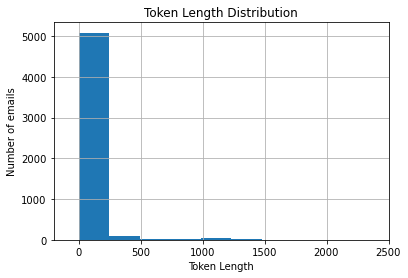

In [334]:
import matplotlib.pyplot as plt

new_emails['nltk_tokens'].apply(len).hist(bins=60)
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Number of emails')
plt.xlim(-200, 2500)
plt.show()
#This tells me that the majority (a little over 5000 emails) 
                                        #lie around between zero and 250 tokens

In [335]:
max_token_row = new_emails.loc[new_emails['nltk_tokens'].apply(len).idxmax()]
max_token_row

Id                                                                     215
MetadataSubject                                 BENHAZI/PROTEST STATEMENTS
MetadataTo                                                               H
MetadataFrom                                             Sullivan, Jacob J
SenderPersonId                                                        87.0
MetadataDateSent                                 2012-09-24 04:00:00+00:00
MetadataDocumentClass                                        HRC_Email_296
ExtractedSubject                            Fw: Benhazi/protest statements
ExtractedBodyText        Attached is full compilation. You never said s...
NewBodyText              attached is full compilation you never said sp...
LemmatizedBodyText       [attach, full, compil, never, said, spontan, c...
nltk_tokens              [Attached, is, full, compilation, ., You, neve...
Name: 214, dtype: object

In [336]:
print(max_token_row['ExtractedBodyText'])

Attached is full compilation. You never said spontaneous or characterized the motives. in fact you were careful in your
first statement to say we were assessing motive and method. The way you treated the video in the Libya context was to
say that some sought to *justify* the attack on that basis.
From Valliani, Amira
Sent: Monday, September 24, 2012 10:08 AM
To: Sullivan, Jacob 3
Subject: Berthazi/protest statements
Attached
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739812
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-SCB0045474
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739812
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.
Statement on the Attack in Benghazi
September 11, 2012
I condemn in the strongest terms the attack on our mission in Benghazi toda

This looks like an email exchange, and it is about four American personnel, including United States Ambassador to Libya Chris Stevens and Foreign Service Information Management Officer Sean Smith, in an attack in Benghazi, Libya on September 12, 2012. The sender expresses deep sorrow and extends condolences to the families, emphasizing Ambassador Stevens' dedication to service and diplomacy.

In [337]:
max_token_index = new_emails['nltk_tokens'].apply(len).idxmax()
max_token_row = new_emails.loc[max_token_index]

print("Index:", max_token_index)
print("nltk_tokens:", max_token_row['nltk_tokens'])


max_token_row = new_emails.loc[max_token_index]
max_token_row

Index: 214
nltk_tokens: ['Attached', 'is', 'full', 'compilation', '.', 'You', 'never', 'said', 'spontaneous', 'or', 'characterized', 'the', 'motives', '.', 'in', 'fact', 'you', 'were', 'careful', 'in', 'your', 'first', 'statement', 'to', 'say', 'we', 'were', 'assessing', 'motive', 'and', 'method', '.', 'The', 'way', 'you', 'treated', 'the', 'video', 'in', 'the', 'Libya', 'context', 'was', 'to', 'say', 'that', 'some', 'sought', 'to', '*', 'justify', '*', 'the', 'attack', 'on', 'that', 'basis', '.', 'From', 'Valliani', ',', 'Amira', 'Sent', ':', 'Monday', ',', 'September', '24', ',', '2012', '10:08', 'AM', 'To', ':', 'Sullivan', ',', 'Jacob', '3', 'Subject', ':', 'Berthazi/protest', 'statements', 'Attached', 'U.S.', 'Department', 'of', 'State', 'Case', 'No', '.', 'F-2015-04841', 'Doc', 'No', '.', 'C05739812', 'Date', ':', '05/13/2015', 'STATE', 'DEPT', '.', '-', 'PRODUCED', 'TO', 'HOUSE', 'SELECT', 'BENGHAZI', 'COMM', '.', 'SUBJECT', 'TO', 'AGREEMENT', 'ON', 'SENSITIVE', 'INFORMATION', '

Id                                                                     215
MetadataSubject                                 BENHAZI/PROTEST STATEMENTS
MetadataTo                                                               H
MetadataFrom                                             Sullivan, Jacob J
SenderPersonId                                                        87.0
MetadataDateSent                                 2012-09-24 04:00:00+00:00
MetadataDocumentClass                                        HRC_Email_296
ExtractedSubject                            Fw: Benhazi/protest statements
ExtractedBodyText        Attached is full compilation. You never said s...
NewBodyText              attached is full compilation you never said sp...
LemmatizedBodyText       [attach, full, compil, never, said, spontan, c...
nltk_tokens              [Attached, is, full, compilation, ., You, neve...
Name: 214, dtype: object

In [338]:
most_frequent_senders = new_emails['MetadataTo'].value_counts()
top_senders = most_frequent_senders.head(5)
top_senders

H                       3503
abedinh@state.gov        306
millscd@state.gov        262
sullivanjj@state.gov     253
JilotyLC@state.gov       192
Name: MetadataTo, dtype: int64

In [339]:
most_frequent_recievers = new_emails['MetadataFrom'].value_counts()
top_recievers = most_frequent_recievers.head(5)
top_recievers

H                    1572
Mills, Cheryl D       794
Abedin, Huma          627
Sullivan, Jacob J     583
Jiloty, Lauren C      242
Name: MetadataFrom, dtype: int64

Based on this, we can infer that **Cheryl D Mills, Huma Abedin, Jacob J Sullivan, and Lauren C Jiloty** are the most prominent people that Hillary Clinton interacts with over email. For later reference, I will get their identification numbers. 

In [340]:
test = new_emails['MetadataFrom']

In [341]:
for alias, count in top_recievers.items():
    print(f"Alias: {alias}")
    match = new_emails.loc[new_emails['MetadataFrom'] == alias].iloc[0]
    sender_person_id = match['SenderPersonId']
    print(f"SenderPersonId: {sender_person_id}")
    print(' ')

Alias: H
SenderPersonId: 80.0
 
Alias: Mills, Cheryl D
SenderPersonId: 32.0
 
Alias: Abedin, Huma
SenderPersonId: 81.0
 
Alias: Sullivan, Jacob J
SenderPersonId: 87.0
 
Alias: Jiloty, Lauren C
SenderPersonId: 116.0
 


I would like to acknowledge that I now recognize these individuals possess numerous aliases and various identifications that I currently cannot consolidate into a single entity. However, at this moment, I will only be monitoring these individuals through the provided sender ids above. Allow me to illustrate how I have come to this realization. 

In [342]:
cher = persons[persons['Name'].str.contains('cheryl', case=False, regex=True)]
print(cher.count())
cher

Id      19
Name    19
dtype: int64


,Id,Name
30,31,Cheryl
31,32,Cheryl Mills
274,275,cheryl.mills jake.sullivan
284,285,cheryl.mills abedinh@state.gov
285,286,cheryl.mill
300,301,cheryl.millf.
302,303,cheryl.millsi
319,320,cheryl.mill sullivanjj@state.gov
320,321,cheryl.mills millscd@state.gov.
330,331,cheryl.mills sullivanjj@state.gov


In [343]:
huma = persons[persons['Name'].str.contains('huma', case=False, regex=True)]
print(huma.count())
huma

Id      9
Name    9
dtype: int64


,Id,Name
80,81,Huma Abedin
313,314,. huma abedin
349,350,huma abed in
355,356,huma abedin b6
359,360,cheryl.mills huma abedin
378,379,preines huma abedin
387,388,cheryl.mill abedin huma
485,486,imuscatine huma abedin b6
506,507,capriciamarshall huma abedin


In [344]:
sullivan = persons[persons['Name'].str.contains('sullivan', case=False, regex=True)]
print(sullivan.count())
sullivan

Id      33
Name    33
dtype: int64


,Id,Name
86,87,Jake Sullivan
230,231,sullivan jacob j nuland victoria 1
242,243,sullivanjj@state.gov.
245,246,sullivanj@state.gov
256,257,jacob j sullivan
257,258,sullivanji@state.gov
258,259,sullivanjj@state.golt
274,275,cheryl.mills jake.sullivan
281,282,sullivanij@state.gov.
291,292,sullivanij@state.gov


In [345]:
data = {'Id': [80.0, 32.0, 81.0, 87.0, 116.0],
        'Names': ['H', 'Mills, Cheryl D', 'Huma Abedin', 'Jacob J Sullivan', 'Lauren C Jiloty']}

top_senders_df = pd.DataFrame(data)
top_senders_df

#Incase I need this later************************


,Id,Names
0,80.0,H
1,32.0,"Mills, Cheryl D"
2,81.0,Huma Abedin
3,87.0,Jacob J Sullivan
4,116.0,Lauren C Jiloty


In [346]:
import pandas as pd
to_drop_ids = [80.0, 32.0, 81.0, 87.0, 116.0]
top_new_emails = new_emails[new_emails['SenderPersonId'].isin(to_drop_ids)]
(top_new_emails)

#Incase I need this later************************


,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText,LemmatizedBodyText,nltk_tokens
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,thx,[thx],[Thx]
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,pis print wednesday september pm fw meet the r...,"[pi, print, wednesday, septemb, pm, fw, meet, ...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,fyi,[fyi],[FYI]
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,fyi,[fyi],"[Fyi, B6, —, —]"
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,fyi,[fyi],[Fyi]
...,...,...,...,...,...,...,...,...,...,...,...,...
7930,7931,THANKS AGAIN,H,"Mills, Cheryl D",32.0,2010-12-15 05:00:00+00:00,Clinton_Email_August_Release,FW: thanks again,Nice\nForgot to tell you about our harrowing c...,nice forgot to tell you about our harrowing ci...,"[nice, forgot, tell, harrow, circl, attempt, l...","[Nice, Forgot, to, tell, you, about, our, harr..."
7932,7933,MORE WIKITHINK,H,"Sullivan, Jacob J",87.0,2010-12-15 05:00:00+00:00,Clinton_Email_August_Release,Fw: more wikithink,Worth a read.,worth read,"[worth, read]","[Worth, a, read, .]"
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n...",the nbcyorker december the envoy posted by hen...,"[nbcyorker, decemb, envoy, post, hendrik, hert...","[THE, NBC/YORKER, December, 14, ,, 2010, The, ..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it...",assume you saw this by now if not its worth re...,"[assum, saw, worth, read, forward, messag]","[B6, I, assume, you, saw, this, by, now, --, i..."


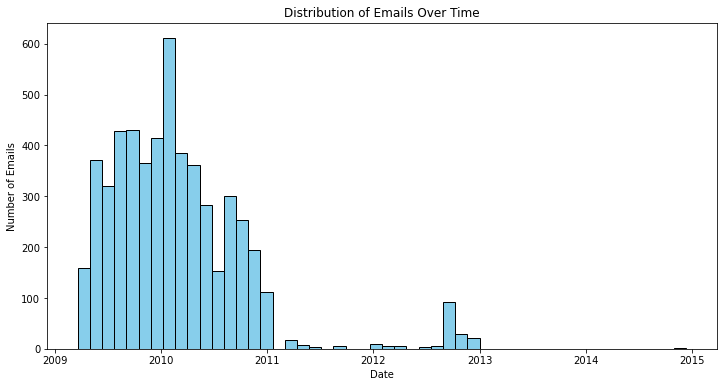

In [356]:
import matplotlib.pyplot as plt
import pandas as pd

plot_emails = new_emails.copy()
plot_emails['MetadataDateSent'] = pd.to_datetime(plot_emails['MetadataDateSent'])
plot_emails.set_index('MetadataDateSent', inplace=True)

#Plotting a histogram to show the distribution of emails over time!
plt.figure(figsize=(12, 6))
plt.hist(plot_emails.index, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Emails Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.show()


I chose to use a histogram over a line plot because with histograms, I am able to group them into bins. I know from my Intro to Data Science class that histograms are typically used for displaying the distribution of discrete data so I was able to put it into bins. With this, I can see that there is clearly a higher volume of emails being sent from 2009 to 2011. This was probably when she was in a high position. Specifically (I looked it up) she was the secretary of state at this time.

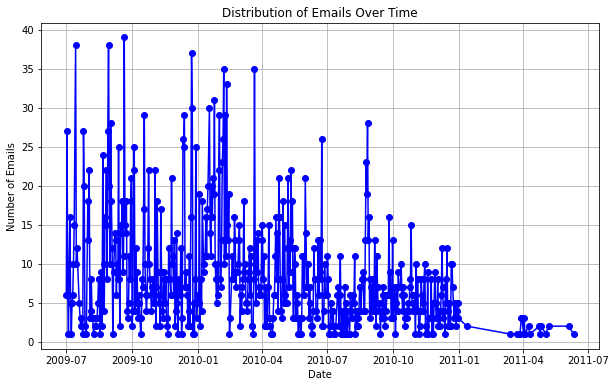

In [360]:
import pandas as pd
import matplotlib.pyplot as plt

plot_emails = new_emails.copy()

#Filter data for mid-2009 to 2011 to take a closer look
start_date = '2009-07-01'  
end_date = '2011-07-01' 

plot_emails = plot_emails[(plot_emails['MetadataDateSent'] >= start_date) & (plot_emails['MetadataDateSent'] <= end_date)]
email_counts = plot_emails.groupby('MetadataDateSent').size().reset_index(name='EmailCount')

plt.figure(figsize=(10, 6))
plt.plot(email_counts['MetadataDateSent'], email_counts['EmailCount'], marker='o', linestyle='-', color='b')
plt.title('Distribution of Emails Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.grid(True)
plt.show()

#Line plot created using ChatGPT


### TF-IDF
- Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. This can provide insights into the main topics and themes discussed in the emails.

In [380]:
#This is going to be taken from lecture 1

tfidf = new_emails.copy()
tfidf['NewBodyText'] = tfidf['NewBodyText'].apply(lambda x: x.split())

tfidf

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDocumentClass,ExtractedSubject,ExtractedBodyText,NewBodyText,LemmatizedBodyText,nltk_tokens
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,Thx,[thx],[thx],[Thx]
5,6,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12 04:00:00+00:00,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,"[pis, print, wednesday, september, pm, fw, mee...","[pi, print, wednesday, septemb, pm, fw, meet, ...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
8,9,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,FVV: Secretary's remarks,FYI,[fyi],[fyi],[FYI]
10,11,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,H,"Sullivan, Jacob J",87.0,2011-03-13 05:00:00+00:00,HRC_Email_296,AbZ and Hb3 on Libya and West Bank/Gaza,Fyi\nB6\n— —,[fyi],[fyi],"[Fyi, B6, —, —]"
12,13,HEY,H,"Sullivan, Jacob J",87.0,2012-09-12 04:00:00+00:00,HRC_Email_296,hey,Fyi,[fyi],[fyi],[Fyi]
...,...,...,...,...,...,...,...,...,...,...,...,...
7937,7938,THE ENVOY,H,"Mills, Cheryl D",32.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,FW: The Envoy,"THE NBC/YORKER\nDecember 14, 2010\nThe Envoy\n...","[the, nbcyorker, december, the, envoy, posted,...","[nbcyorker, decemb, envoy, post, hendrik, hert...","[THE, NBC/YORKER, December, 14, ,, 2010, The, ..."
7938,7939,UPDATE,H,"Stern, Todd D",204.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,update,"Hi. Sorry I haven't had a chance to see you, b...","[hi, sorry, havent, had, chance, to, see, you,...","[hi, sorri, havent, chanc, see, want, hear, di...","[Hi, ., Sorry, I, have, n't, had, a, chance, t..."
7939,7940,RICHARD (TNR),H,"Sullivan, Jake",87.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Fwd: FW: Richard (TNR),"B6\nI assume you saw this by now -- if not, it...","[assume, you, saw, this, by, now, if, not, its...","[assum, saw, worth, read, forward, messag]","[B6, I, assume, you, saw, this, by, now, --, i..."
7941,7942,SENATE,H,"Verma, Richard R",180.0,2010-12-16 05:00:00+00:00,Clinton_Email_August_Release,Senate,Big change of plans in the Senate. Senator Rei...,"[big, change, of, plans, in, the, senate, sena...","[big, chang, plan, senat, senat, reid, announc...","[Big, change, of, plans, in, the, Senate, ., S..."


In [382]:
new_tfidf = new_emails[['Id', 'NewBodyText']].copy()
new_tfidf

,Id,NewBodyText
2,3,thx
5,6,pis print wednesday september pm fw meet the r...
8,9,fyi
10,11,fyi
12,13,fyi
...,...,...
7937,7938,the nbcyorker december the envoy posted by hen...
7938,7939,hi sorry havent had chance to see you but did ...
7939,7940,assume you saw this by now if not its worth re...
7941,7942,big change of plans in the senate senator reid...


In [384]:
new_tfidf['word_total'] = new_tfidf['NewBodyText'].apply(lambda x: len(x.split(' ')))
new_tfidf['word_total'].describe()

count     5350.000000
mean        67.437009
std        356.154401
min          1.000000
25%          4.000000
50%         11.000000
75%         28.000000
max      12473.000000
Name: word_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

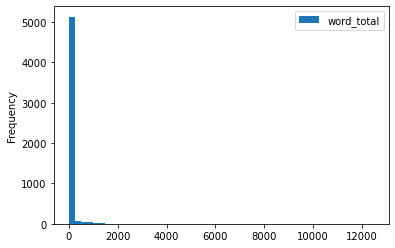

In [385]:
(new_tfidf
 .drop(columns=['Id', 'NewBodyText'])
 .plot(kind='hist', bins=50)
)

In [386]:
new_tfidf.query('word_total > 300')

,Id,NewBodyText,word_total
28,29,httpreligionbogscnncom my take deadlv link bet...,1124
46,47,httpwwwsaloncomiooorgopsoctobersurprisei monda...,1139
57,58,this is it pretty uncompelling piece if you as...,886
64,65,from pa clips sent saturday october am to pa m...,623
72,73,prom nora toiv mato sent sun ay april pm to mi...,461
...,...,...,...
7756,7757,les gelb who oversaw the writing of the pentag...,1128
7765,7766,here is the republican former secretaries of s...,905
7849,7850,opinion december new start ratify with caveats...,948
7933,7934,the unsigned editorials will appear in all of ...,933


In [388]:
import numpy as np
f"The 95th percentile of the conversation length is: {np.percentile(new_tfidf['word_total'].tolist(), 95)} words"

'The 95th percentile of the conversation length is: 195.0 words'

In [389]:
# Tokenize the tweet using SpaCy
import spacy
import string

from tqdm import tqdm
tqdm.pandas()

punctuation = list(string.punctuation)
NLP = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [390]:
# Let's get a list of the lemmas to count the frequency of words but remove the punctuation
new_tfidf['tokens'] = new_tfidf['NewBodyText'].progress_apply(lambda x: [x.lemma_.lower() for x in NLP(x) if x.lemma_.lower() not in punctuation])

100%|██████████████████████████████████████| 5350/5350 [00:26<00:00, 201.05it/s]


In [391]:
new_tfidf_tokens = (new_tfidf.explode('tokens')
                    .drop(columns=['NewBodyText', 'word_total']))

In [393]:
new_tfidf_tokens

,Id,tokens
2,3,thx
5,6,pis
5,6,print
5,6,wednesday
5,6,september
...,...,...
7941,7942,start
7941,7942,time
7941,7942,shortly
7944,7945,see


In [394]:
term_frequency = (new_tfidf_tokens
                  .groupby(by=['Id', 'tokens'])
                  .agg({'tokens': 'count'})
                  .rename(columns={'tokens': 'term_frequency'})
                  .reset_index()
                  .rename(columns={'tokens': 'term'})
                 )

In [395]:
term_frequency

,Id,term,term_frequency
0,3,thx,1
1,6,agreement,1
2,6,anti,3
3,6,behind,3
4,6,benghazi,1
...,...,...,...
178483,7942,we,1
178484,7942,will,2
178485,7942,with,1
178486,7945,below,1


In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
         'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
         'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
         'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
         'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
         'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

In [396]:
# remove stop words
term_frequency = term_frequency.drop(term_frequency[term_frequency['term'].isin(stop_words)].index)
term_frequency

,Id,term,term_frequency
0,3,thx,1
1,6,agreement,1
2,6,anti,3
3,6,behind,3
4,6,benghazi,1
...,...,...,...
178475,7942,tell,1
178479,7942,time,1
178481,7942,tomorrow,1
178482,7942,treaty,1


In [397]:
document_frequency = (term_frequency
                      .groupby(['Id', 'term'])
                      .size()
                      .unstack()
                      .sum()
                      .reset_index()
                      .rename(columns={0: 'document_frequency'})
                     )

In [398]:
document_frequency

,term,document_frequency
0,aa,3.0
1,aab,2.0
2,aafia,1.0
3,ab,1.0
4,abandon,18.0
...,...,...
17531,zuma,2.0
17532,zumbi,1.0
17533,zurich,1.0
17534,zxhtmi,1.0


In [399]:
term_frequency = term_frequency.merge(document_frequency)

In [401]:
documents_in_corpus = term_frequency['Id'].nunique()
documents_in_corpus

5174

In [402]:
# inverse document frequency
term_frequency['idf'] = np.log((1 + documents_in_corpus) / (1 + term_frequency['document_frequency'])) + 1

In [403]:
term_frequency

,Id,term,term_frequency,document_frequency,idf
0,3,thx,1,191.0,4.294099
1,48,thx,1,191.0,4.294099
2,104,thx,1,191.0,4.294099
3,301,thx,1,191.0,4.294099
4,303,thx,1,191.0,4.294099
...,...,...,...,...,...
131693,7938,voluble,1,1.0,8.858447
131694,7938,windswept,1,1.0,8.858447
131695,7938,wisecrack,1,1.0,8.858447
131696,7938,zevons,1,1.0,8.858447


In [404]:
term_frequency['tfidf'] = term_frequency['term_frequency'] * term_frequency['idf']
term_frequency.sort_values(by=['term_frequency'], ascending=False)

,Id,term,term_frequency,document_frequency,idf,tfidf
3348,215,state,142,425.0,3.497155,496.596049
116947,5288,mcchrystal,134,9.0,7.249010,971.367276
119112,3086,branch,79,11.0,7.066688,558.268349
418,215,benghazi,76,47.0,5.680394,431.709914
19952,215,people,74,190.0,4.299321,318.149768
...,...,...,...,...,...,...
51167,3086,steadfast,1,2.0,8.452982,8.452982
51166,58,steadfast,1,2.0,8.452982,8.452982
51165,7938,st,1,53.0,5.562611,5.562611
51164,7880,st,1,53.0,5.562611,5.562611


This is interesting!!! We see that **state** has appeared once again! But now new terms follow below it like _mcchrystal, branch, benghazi_ !

In [376]:
#Now I will normalize the data

In [405]:
from sklearn import preprocessing
term_frequency['tfidf_norm'] = preprocessing.normalize(term_frequency[['tfidf']], axis=0, norm='l2')

In [406]:
term_frequency

,Id,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm
0,3,thx,1,191.0,4.294099,4.294099,0.000764
1,48,thx,1,191.0,4.294099,4.294099,0.000764
2,104,thx,1,191.0,4.294099,4.294099,0.000764
3,301,thx,1,191.0,4.294099,4.294099,0.000764
4,303,thx,1,191.0,4.294099,4.294099,0.000764
...,...,...,...,...,...,...,...
131693,7938,voluble,1,1.0,8.858447,8.858447,0.001576
131694,7938,windswept,1,1.0,8.858447,8.858447,0.001576
131695,7938,wisecrack,1,1.0,8.858447,8.858447,0.001576
131696,7938,zevons,1,1.0,8.858447,8.858447,0.001576


In [407]:
top_n_terms = term_frequency.sort_values(by=['Id', 'tfidf'], ascending=[True, False]).groupby(['Id']).head(5)

In [409]:
top_n_terms.head(5)

,Id,term,term_frequency,document_frequency,idf,tfidf,tfidf_norm
0,3,thx,1,191.0,4.294099,4.294099,0.000764
755,6,deadly,3,6.0,7.605684,22.817053,0.004060
3316,6,spark,3,6.0,7.605684,22.817053,0.004060
2745,6,riot,3,7.0,7.472153,22.416459,0.003989
1093,6,extremist,3,16.0,6.718381,20.155144,0.003587


These terms that are 'thx' (thanks), 'deadly,' 'spark,' 'riot,' and 'extremist' show me high IDF scores, indicating their infrequent occurrence across larger scale of different docs but increased importance within the context of Hillary Clinton's emails. The term 'thx' appears frequently but has a relatively low IDF score, suggesting it is quite common apparently in the overall dataset. On the other hand, terms like 'deadly,' 'spark,' 'riot,' and 'extremist' have substantially higher IDF scores, indicating their specificity and importance in certain emails. This is probably related to security, events, or critical situations. The TF-IDF values further emphasize the significance of these terms within the analyzed email corpus.

In [410]:
docIds = top_n_terms['Id'].tolist()

In [411]:
new_tfidf[new_tfidf['Id'] == 41]['NewBodyText'].values

array(['fyi'], dtype=object)

I am surprised that 'fyi' came a the top of this list. Considering this is quite unimportant. It is commonly used in communication to share information without necessarily expecting a response or action. When reading it over, I do remember seeing that abbreviation a lot, but I did not attribute much significance to it. Even though its importance in conveying meaningful information is relatively low, it seems that I would have to do a lot more sorting to figure out any deeper meaning. 

## Temporal Analysis

All in all, this took a lot longer than I expected. I have done smaller assignments in the past but nothing like this. I enjoyed how I was allowed creative freedom in this, and so I took notes along the way. I really hope that you can see my thought process in this. I would have never expected that outcome in my TF-IDF at all. If I had more time, I would like to go further in depth with htis. I think that in the later assignments I will be given this opportunity, and as I learn about different NLP methods I can possibly investigate this further!